# Dacon 데이콘 Basic 스트레스 지수 예측 : 건강 데이터로 마음의 균형을 찾아라!
### https://dacon.io/competitions/official/236526/codeshare/12529?page=1&dtype=recent
### github
- https://github.com/HOYUN-Y/DataAnalytics_projects



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib
import scipy.stats as spst

pd.set_option('display.max_columns',None)

In [2]:
train = pd.read_csv('../../git_ignore_file/Dataset/dacon_stress_prediction/train.csv')
test = pd.read_csv('../../git_ignore_file/Dataset/dacon_stress_prediction/test.csv')
submission = pd.read_csv('../../git_ignore_file/Dataset/dacon_stress_prediction/sample_submission.csv')

In [3]:
display(train.head())
display(test.head())

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working
0,TEST_0000,F,72,161.95,77.66,312.36,137,112,131.16,0.51,moderate,current-smoker,high blood pressure,heart disease,oversleeping,graduate degree,NaN
1,TEST_0001,F,84,152.35,58.70,269.54,162,95,129.36,0.51,intense,current-smoker,NaN,NaN,normal,graduate degree,NaN
2,TEST_0002,F,45,164.09,76.71,209.08,146,91,169.21,1.13,light,ex-smoker,diabetes,heart disease,sleep difficulty,bachelors degree,6.0
3,TEST_0003,M,58,165.06,76.34,246.52,146,98,133.78,0.52,light,current-smoker,heart disease,heart disease,sleep difficulty,high school diploma,10.0
4,TEST_0004,F,35,158.17,65.60,181.24,142,80,73.93,1.42,moderate,ex-smoker,diabetes,heart disease,oversleeping,NaN,7.0


### Data Info
- ID : 샘플별 고유 ID
- gender : 성별
- age : 연령
- height : 키(cm)
- weight : 몸무게(kg)
- cholesterol : 콜레스테롤 수치
- systolic_blood_pressure : 수축기 혈압
- diastolic_blood_pressure : 이완기 혈압
- glucose : 혈당 수치(mg/dL)
- bone_density : 골밀도(g/cm²)
- activity : 생활시 운동 강도
- smoke_status : 흡연 상태
- medical_history : 만성질환
- family_medical_history : 가족력
- sleep_pattern : 수면패턴
- edu_level : 학력
- mean_working : 1주일당 평균 근로 시간
- stress_score : (TARGET) 스트레스 점수 


### purpose
- Target : stress_score


# Data Check & EDA

In [6]:
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


In [11]:
display(train.describe())
display(train.info())

,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,mean_working,stress_score
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,1968.000000,3000.000000
mean,53.06800,168.585687,72.486680,233.910523,146.144333,95.504000,126.467720,0.933367,8.716972,0.482130
std,20.67207,9.351876,13.167222,24.333434,15.845310,9.895283,18.536844,0.444783,1.628944,0.288252
min,17.00000,141.130000,36.320000,148.810000,97.000000,60.000000,70.050000,-0.220000,4.000000,0.000000
25%,35.00000,161.800000,63.035000,216.927500,135.000000,89.000000,113.912500,0.560000,8.000000,0.230000
50%,53.00000,168.115000,71.240000,234.255000,146.000000,95.000000,126.555000,0.940000,9.000000,0.480000
75%,72.00000,175.352500,81.832500,250.377500,158.000000,102.000000,139.180000,1.300000,10.000000,0.730000
max,89.00000,195.280000,120.880000,313.350000,191.000000,124.000000,185.740000,2.000000,16.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

None

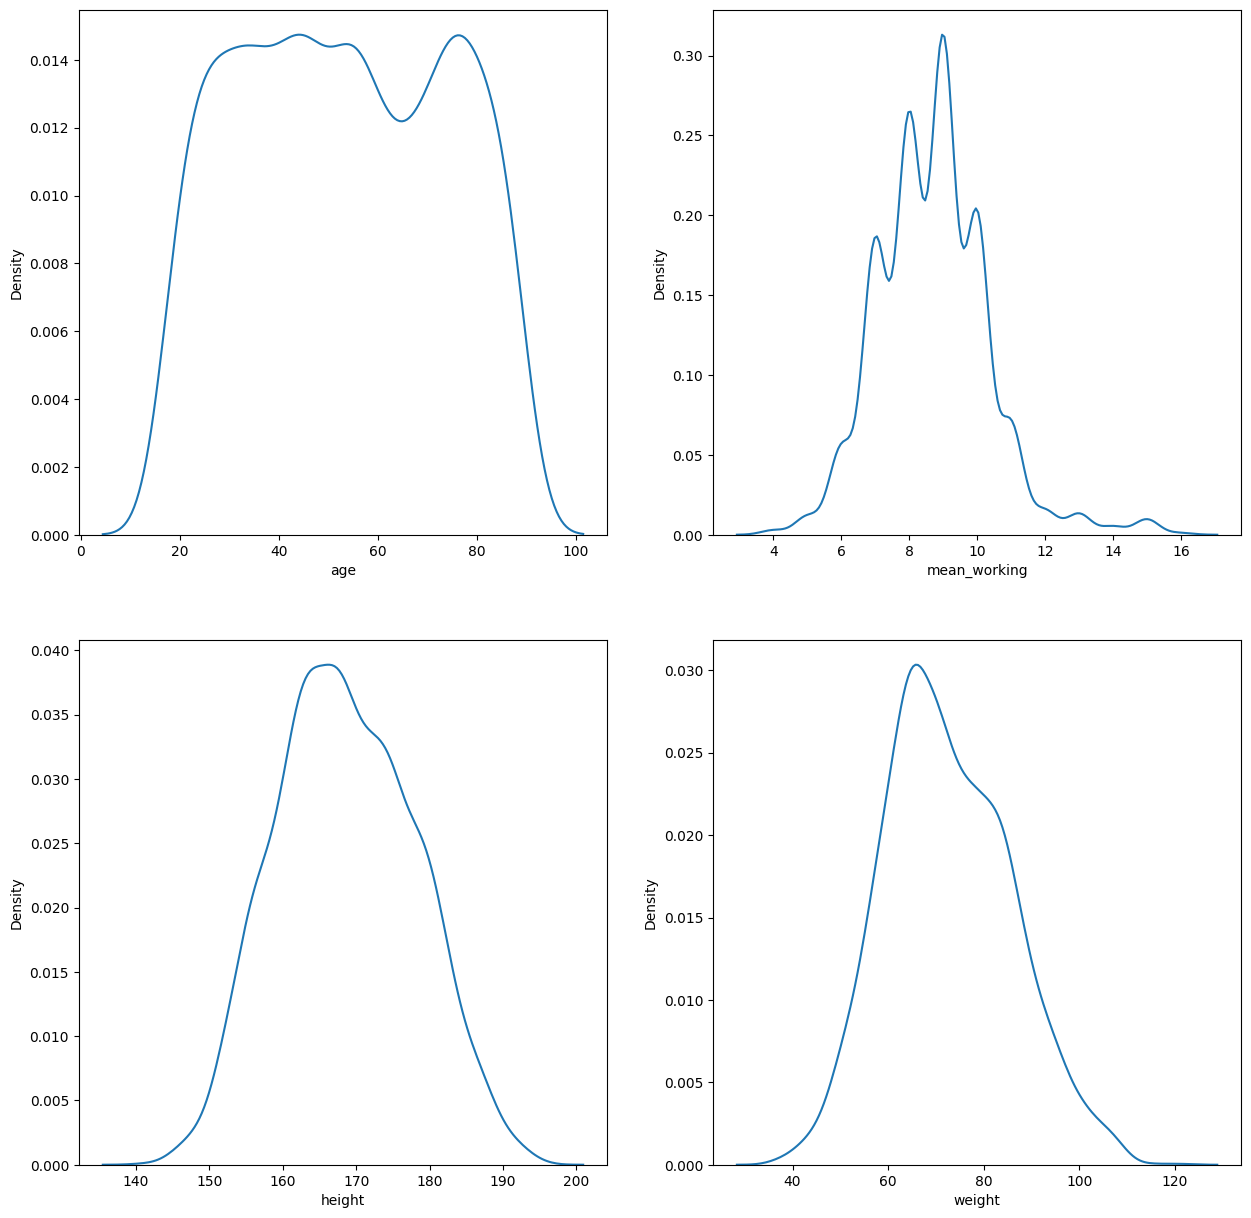

In [32]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,15))

sns.kdeplot(train['age'], ax=axes[0,0])
sns.kdeplot(train['mean_working'], ax=axes[0,1])
sns.kdeplot(x='height', data=train, ax=axes[1,0])
sns.kdeplot(x='weight', data=train, ax=axes[1,1])
plt.show()

In [ ]:
train[train['age']<20].sort_values('age') #20대 미만은 17살부터, 91개 레코드

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
1738,TRAIN_1738,F,17,174.11,65.44,240.31,110,69,97.25,1.52,moderate,ex-smoker,heart disease,heart disease,oversleeping,bachelors degree,NaN,0.08
940,TRAIN_0940,M,17,173.17,56.04,189.23,149,77,129.32,1.69,moderate,ex-smoker,NaN,NaN,normal,graduate degree,NaN,0.28
1765,TRAIN_1765,M,17,173.27,56.04,189.48,149,77,129.13,1.70,moderate,ex-smoker,NaN,NaN,normal,graduate degree,NaN,0.28
1520,TRAIN_1520,F,17,164.10,57.80,189.95,106,83,97.82,1.54,moderate,non-smoker,NaN,NaN,normal,bachelors degree,NaN,0.66
2899,TRAIN_2899,M,17,175.32,78.54,207.88,141,83,111.80,1.62,moderate,ex-smoker,diabetes,high blood pressure,sleep difficulty,NaN,NaN,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,TRAIN_0794,M,19,185.11,83.28,210.53,106,72,143.20,1.44,light,non-smoker,high blood pressure,high blood pressure,normal,graduate degree,10.0,0.74
719,TRAIN_0719,M,19,177.20,87.62,202.43,117,77,128.97,1.38,light,non-smoker,diabetes,heart disease,sleep difficulty,bachelors degree,7.0,0.37
1330,TRAIN_1330,F,19,156.77,70.76,204.74,141,90,139.90,1.61,light,non-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,8.0,0.38
1791,TRAIN_1791,M,19,162.80,58.81,227.67,133,88,100.00,1.53,moderate,non-smoker,high blood pressure,NaN,sleep difficulty,high school diploma,7.0,0.65


<Axes: xlabel='stress_score', ylabel='Density'>

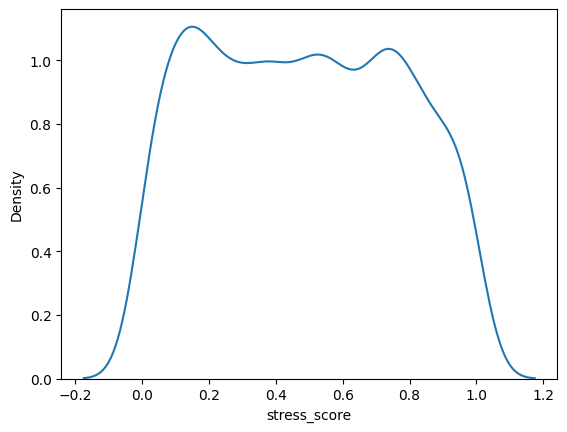

In [33]:
sns.kdeplot(x='stress_score', data=train)

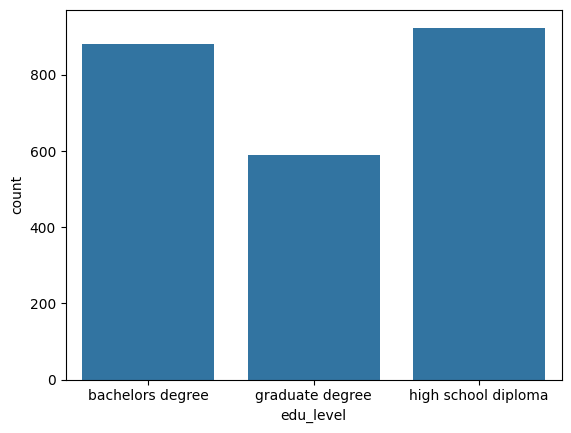

In [36]:
sns.countplot(x='edu_level', data=train)
plt.show()

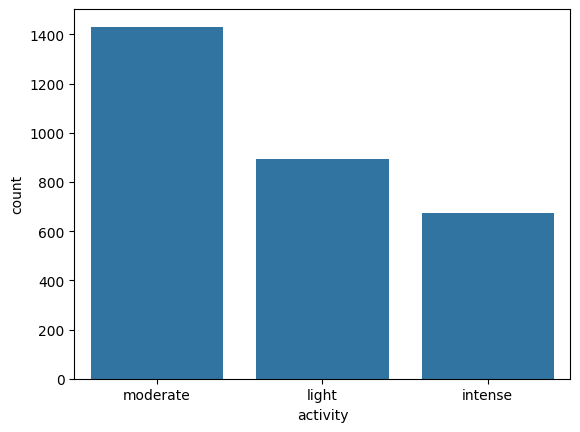

In [ ]:
sns.countplot(x='activity', data=train)
plt.show()

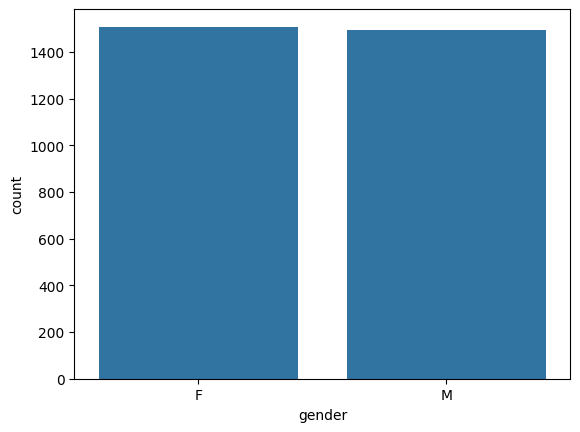

In [37]:
sns.countplot(x='gender', data=train)
plt.show()

<Axes: xlabel='sleep_pattern', ylabel='count'>

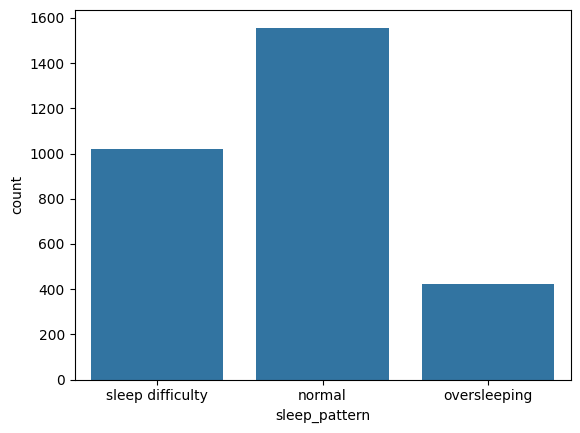

In [56]:
sns.countplot(x='sleep_pattern', data=train)

In [43]:
print('Female : ',len(train[train['gender']=='F']))
print('Male : ',len(train[train['gender']=='M']))

Female :  1508
Male :  1492


# EDA

In [46]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

None

<Axes: xlabel='gender', ylabel='stress_score'>

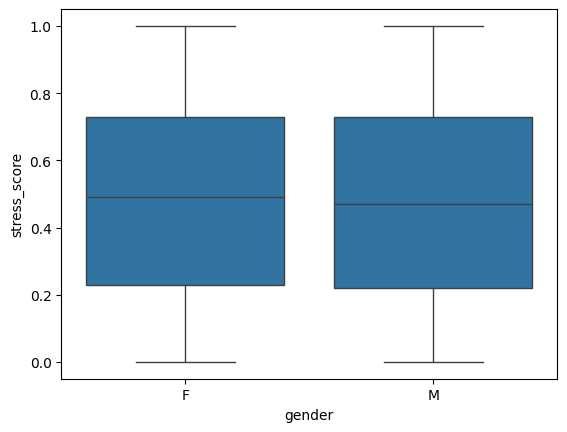

In [47]:
sns.boxplot(x='gender', y='stress_score', data=train)

<Axes: xlabel='smoke_status', ylabel='stress_score'>

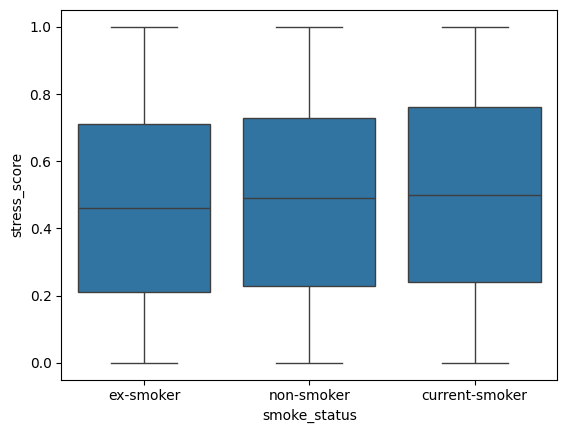

In [48]:
sns.boxplot(x='smoke_status', y='stress_score', data=train)

<Axes: xlabel='activity', ylabel='stress_score'>

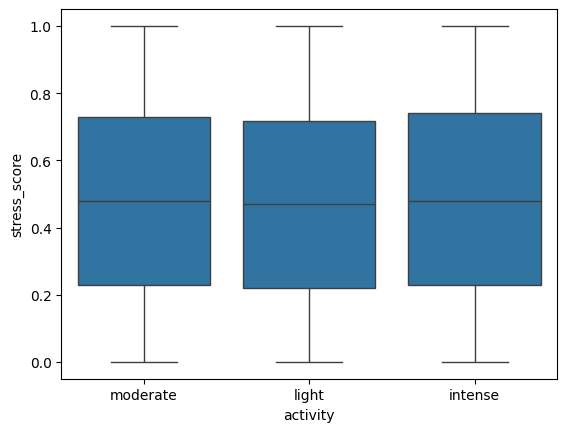

In [ ]:
sns.boxplot(x='activity', y='stress_score', data=train)

In [83]:
train['grade'] = train['age']
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score,grade
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63,72
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83,88
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70,47
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17,69
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36,81


In [82]:
display(train[['age']].sort_values('age')) #17~89age
train[(train['age']>17) & (train['age']<20)]

,age
1367,17
1520,17
2676,17
1297,17
940,17
...,...
1884,89
2503,89
1907,89
275,89


,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
5,TRAIN_0005,M,18,173.55,59.00,217.46,121,73,103.79,1.61,moderate,non-smoker,NaN,NaN,normal,high school diploma,NaN,0.83
17,TRAIN_0017,M,18,167.45,69.50,178.28,126,60,103.43,1.54,intense,ex-smoker,heart disease,diabetes,sleep difficulty,bachelors degree,NaN,0.30
66,TRAIN_0066,F,18,155.26,50.56,175.16,132,86,133.85,1.85,light,ex-smoker,NaN,NaN,normal,NaN,NaN,0.18
72,TRAIN_0072,F,18,164.19,50.62,238.15,138,96,88.28,1.53,moderate,non-smoker,high blood pressure,NaN,normal,high school diploma,NaN,0.92
74,TRAIN_0074,F,18,161.53,79.15,231.48,136,94,103.55,1.72,light,non-smoker,diabetes,diabetes,normal,bachelors degree,NaN,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,TRAIN_2792,F,18,147.71,73.61,207.00,112,98,122.96,1.87,light,ex-smoker,diabetes,diabetes,sleep difficulty,high school diploma,NaN,0.40
2834,TRAIN_2834,F,18,161.72,69.15,227.50,134,85,133.71,2.00,moderate,non-smoker,high blood pressure,heart disease,sleep difficulty,graduate degree,NaN,0.74
2868,TRAIN_2868,F,19,156.24,72.24,241.52,126,81,99.14,1.55,moderate,current-smoker,diabetes,high blood pressure,normal,high school diploma,10.0,0.88
2886,TRAIN_2886,F,19,167.35,60.99,213.20,123,89,124.64,1.59,moderate,non-smoker,NaN,NaN,normal,graduate degree,9.0,0.91


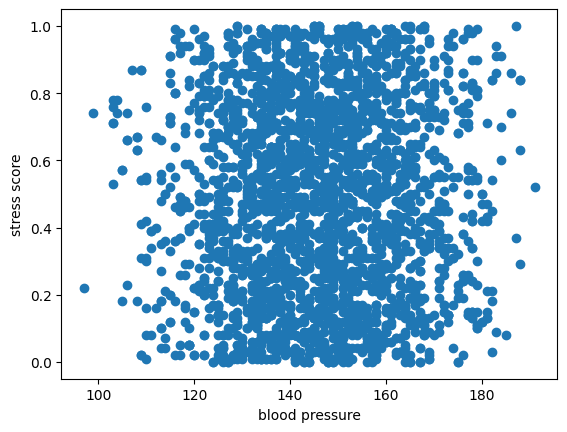

In [65]:
plt.scatter(train['systolic_blood_pressure'], train['stress_score'])
plt.xlabel('blood pressure')
plt.ylabel('stress score')
plt.show()

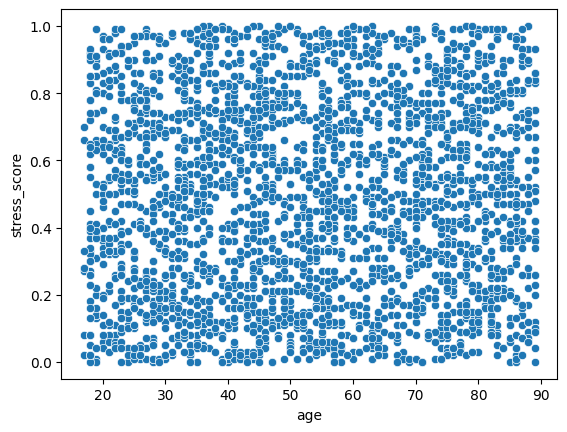

In [70]:
sns.scatterplot(x= train['age'], y= train['stress_score'])
plt.show()

# Preprocessing